In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
df = pd.read_csv('../input/Mall_Customers.csv')
df.head()
df.info()
# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


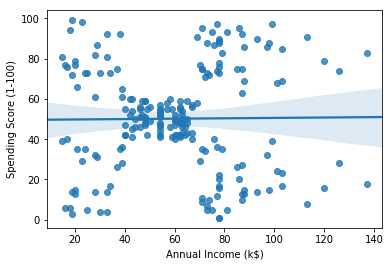

In [2]:
# interested to see if income has a strong relationship with spending score
#conclusion: no relationship, seems like low income can have high spending score

sns.regplot(x='Annual Income (k$)',y='Spending Score (1-100)', data = df)

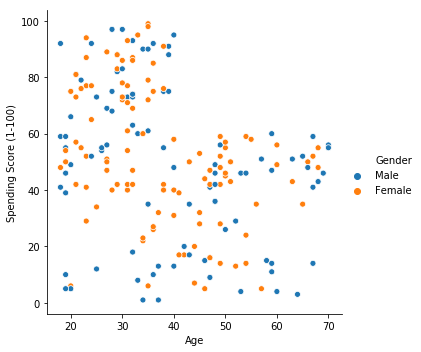

In [3]:
#interested to see if females spends more than males
#conclusion: seems like male and female shopping habits are well distributed 
sns.relplot(x = 'Age', y= 'Spending Score (1-100)', hue = 'Gender', data = df)


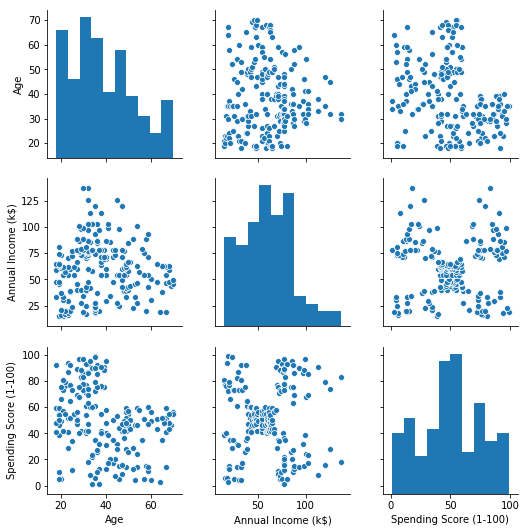

In [4]:
df.columns
df_smaller = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
sns.pairplot(df_smaller)

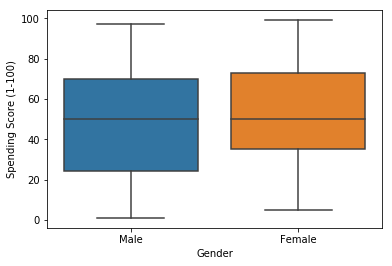

In [5]:
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)

In [6]:
#binning the age to help with the data organization
bins = [10,20,30,40,50,60,70]
labels = ['11-20','21-30','31-40','41-50','51-60','61-70']
df['Age_Binned'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [7]:
df_dummies = pd.get_dummies(df_smaller)
df_dummies.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [8]:
#do a linear regression for exploration
from sklearn.linear_model import LinearRegression
x = df_dummies[['Age','Annual Income (k$)','Gender_Female','Gender_Male']]
y = df_dummies[['Spending Score (1-100)']]

model = LinearRegression()
model.fit(x,y)
model.score(x,y)


0.10860622655322894

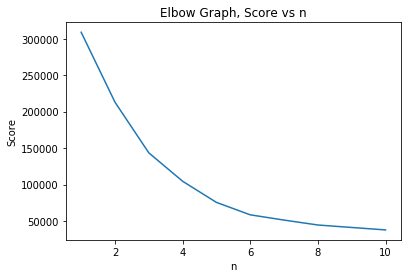

In [9]:
#do kmeans for clustering
from sklearn.cluster import KMeans

score = []
for n in range(1,11):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(df_dummies)
    value = kmeans.inertia_
    score.append(value)
    
x = list(range(1,11))
y = score

plt.plot(x,y)
plt.ylabel('Score')
plt.xlabel('n')
plt.title('Elbow Graph, Score vs n')
plt.show()

#seems like n=5 is a good cluster value
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_dummies)
labels = kmeans.labels_

df_dummies['Labels'] = pd.Series(labels, index=df_dummies.index)


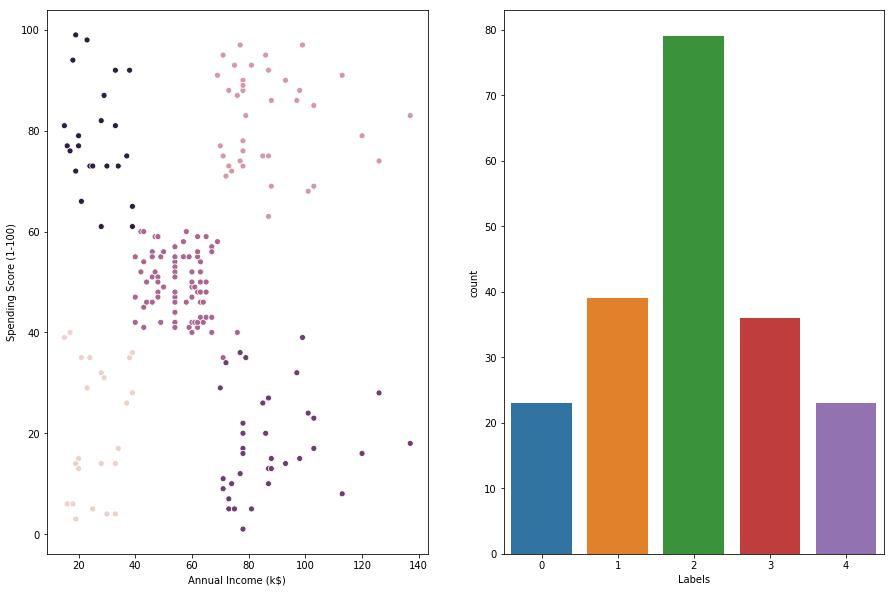

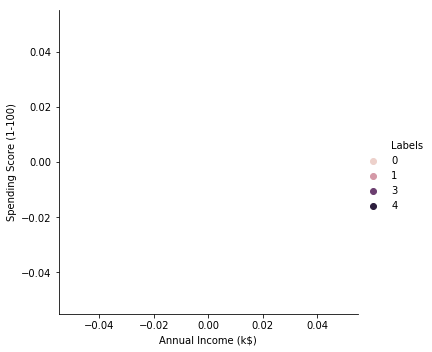

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
sns.relplot( ax = ax[0], x = 'Annual Income (k$)', y= 'Spending Score (1-100)', hue = 'Labels', data = df_dummies)
sns.countplot(x = 'Labels', data = df_dummies, ax=ax[1])                                                                                                                   

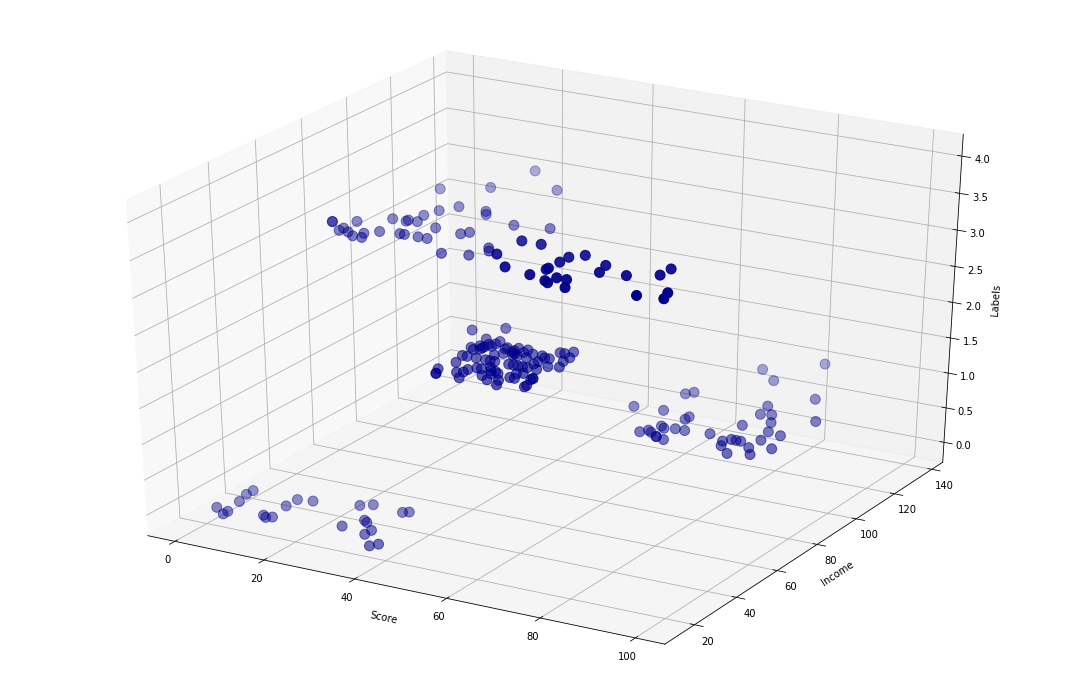

In [18]:
#target customer base
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(df_dummies['Spending Score (1-100)'], df_dummies['Annual Income (k$)'], df_dummies['Labels'], 
           c='darkblue',s = 100)
ax.set(xlabel='Score',ylabel='Income',zlabel='Labels')
plt.show()